# Programming Exercise 3: Multi-class Classification and Neural Networks

# 1 Multi-class Classification

# 1.1 Dataset

In [1]:
# Make y back to normal. (10 -> 0)
import numpy as np
from scipy.io import loadmat

mat = loadmat('data/ex3data1.mat')
X = mat['X']
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

y = mat['y'][:, 0]
y = np.array(list(map(lambda x: 0 if x == 10 else x, y)))

X.shape, y.shape

((5000, 401), (5000,))

# 1.2 Visualizing the data
试了一下 numpy，发现没有办法对矩阵内部的小矩阵赋值（要么就是花式索引到对角线去了，要么就是对一个切片赋值了），所以换回了 pandas 用其中的 loc 进行索引赋值（iloc 不能用）

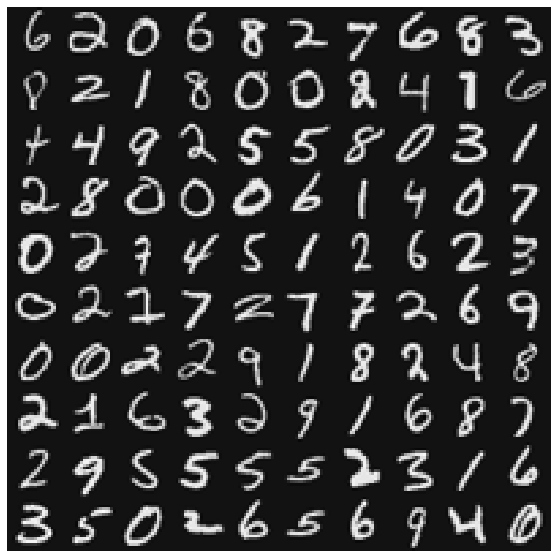

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_numbers(src):
    """输入的 src 的 shape[0] 必须是平方数"""
    size = round(src.shape[0] ** 0.5)
    data = np.zeros((20 * size, 20 * size))
    def modify(i, j):
        data[20 * i: 20 * (i + 1), 20 * j: 20 * (j + 1)] = src[i * size + j, :].reshape((20, 20)).T
    [modify(i, j) for i in range(size) for j in range(size)]

    fig = plt.figure(figsize=(size, size))
    ax = fig.gca()
    ax.matshow(data, cmap='gray')

    plt.axis('off')
    plt.show()

plot_numbers(X[np.random.randint(low=0, high=5000 + 1, size=100), 1:])

# 1.3 Vectorizing Logistic Regression

In [3]:
def sigmoid(z):
    return 1 / (1 + np.e ** (-z))

def hypothesis(theta, z):
    return sigmoid(z @ theta)

def cost_function(theta, X, y):
    m = len(y)
    return (-y * np.log(hypothesis(theta, X)) - (1 - y) * np.log(1 - hypothesis(theta, X))).mean()

def cost_function_reg(theta, X, y, lam):
    m = len(y)
    return (-y * np.log(hypothesis(theta, X)) - (1 - y) * np.log(1 - hypothesis(theta, X))).mean() + lam / 2 / m * (theta[1:] ** 2).sum()

def gradient(theta, X, y):
    m = len(y)
    return 1 / m * X.T @ (hypothesis(theta, X) - y)

def gradient_reg(theta, X, y, lam):
    m = len(y)
    grad = 1 / m * X.T @ (hypothesis(theta, X) - y)
    grad[1:] += lam / m * theta[1:]
    return grad

# 1.4 One-vs-all Classification

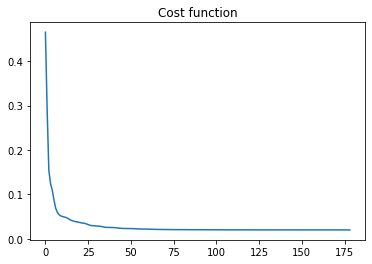

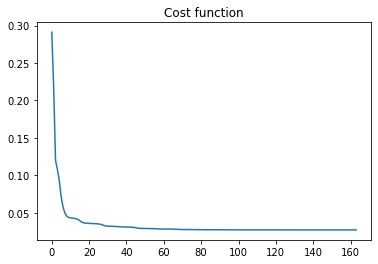

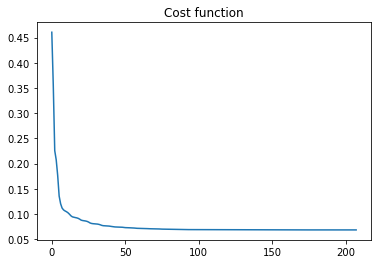

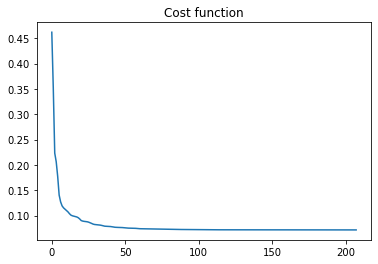

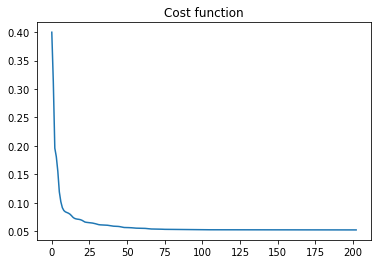

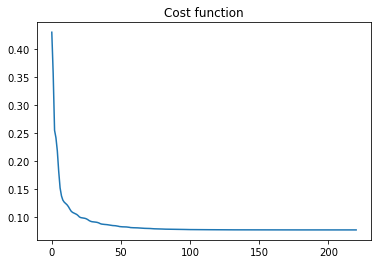

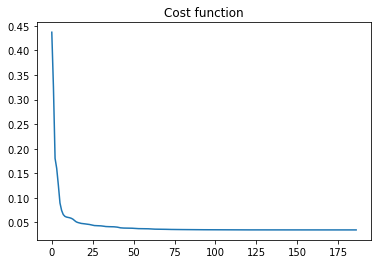

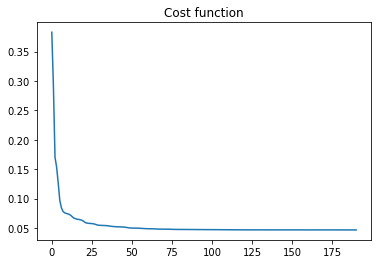

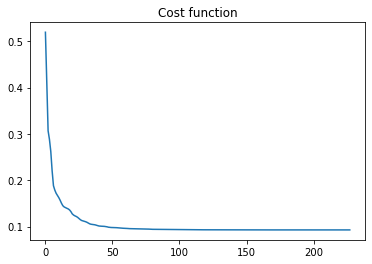

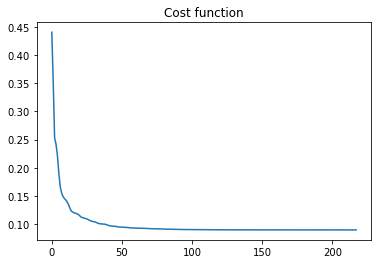

In [4]:
from scipy.optimize import minimize

LAM = 1
K = 10

thetas = []

def learning(X, y):
    costs = []
    def cb(theta):
        costs.append(cost_function_reg(theta, X, y, LAM))
    result = minimize(cost_function_reg, np.zeros(X.shape[1]), (X, y, LAM), method='BFGS', jac=gradient_reg, callback=cb)
    plt.plot(costs)
    plt.title('Cost function')
    plt.show()
    return result.x

for k in range(K):
    yk = (y == k).astype(int)
    thetas.append(learning(X, yk))

thetas = np.array(thetas) # thetas is of shape (10, 401)

In [5]:
y_pred = np.argmax(X @ thetas.T, axis=1)
accuracy = sum((y_pred - y) == 0) / len(y)
accuracy

0.9446

# 2 Neural Networks

In [6]:
mat = loadmat('data/ex3weights.mat')
theta1 = mat['Theta1']
theta2 = mat['Theta2']
theta1.shape, theta2.shape

((25, 401), (10, 26))

In [7]:
A1 = X
A2 = sigmoid(np.concatenate((np.ones((A1.shape[0], 1)), A1 @ theta1.T), axis=1))
y_pred = np.argmax(sigmoid(A2 @ theta2.T), axis=1) + 1

# Make y back to abnormal. (0 -> 10)
yp = np.array(list(map(lambda x: 10 if x == 0 else x, y)))

accuracy = sum((y_pred - yp) == 0) / len(y)
accuracy

0.9752